# Trabajo Final
Nicolás Maldonado - Miguel Gómez
## Preparacion de Datos
8 / Enero / 2024<br>
Master en Ciencia de Datos y Aprendizaje Automatico

## Descripción: National Health Insurance Corporation_Health checkup information

## Objetivo:
Health checkup information refers to the general health checkup results of national health insurance employee subscribers, dependents over 40 years of age, local subscribers who are heads of households, and local subscribers over 40 years of age, and the information received by those who have reached the age of 40 and 66 among these general health checkup subjects. This is open data consisting of basic information (sex, age group, city/province code, etc.) and examination details (height, weight, total cholesterol, hemoglobin, etc.) on 1 million people each year who have a history of health examination during the transition period of life.

Origen de los datos: Data.go.kr -> [National Health Insurance Corporation_Health checkup information](https://www.data.go.kr/data/15007122/fileData.do)

NOTA: Este repositorio es un repositorio Koreano donde encontramos la data sin procesar de este caso expuesto en kaggle
[Body signal of smoking](https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

## Exploración de los datos - Creación base de Trabajo

In [2]:
df_original = pd.read_csv('Smoking/data-kor.CSV', encoding='cp949')
df_original

,기준년도,가입자 일련번호,시도코드,성별코드,연령대코드(5세 단위),신장(5cm 단위),체중(5kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,콜레스테롤(HDL),콜레스테롤(LDL),혈색소,요단백,혈청크레아티닌,간기능검사(AST),간기능검사(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석
0,2021,3603281,26,2,9,165,60,83.0,1.0,1.0,1.0,1.0,105.0,65.0,94.0,NaN,NaN,NaN,NaN,14.4,1.0,0.8,23.0,28.0,11.0,1.0,1.0,1,0.0,NaN,NaN,NaN,1.0
1,2021,1055961,11,1,11,170,70,84.0,0.9,1.0,1.0,1.0,124.0,66.0,105.0,NaN,NaN,NaN,NaN,15.0,1.0,0.9,22.0,24.0,104.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN
2,2021,3237995,43,1,14,170,70,94.0,0.8,0.4,1.0,1.0,144.0,84.0,91.0,209.0,134.0,60.0,122.0,15.5,1.0,0.8,45.0,57.0,191.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN
3,2021,3171504,49,1,11,175,80,95.0,1.2,1.2,1.0,1.0,144.0,96.0,99.0,NaN,NaN,NaN,NaN,16.0,1.0,1.3,30.0,38.0,52.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN
4,2021,4107697,44,2,11,160,70,92.0,1.5,1.5,1.0,1.0,142.0,81.0,103.0,NaN,NaN,NaN,NaN,13.8,1.0,0.6,35.0,30.0,14.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2021,3120240,45,1,11,155,65,86.0,1.5,1.5,1.0,1.0,134.0,84.0,106.0,178.0,39.0,102.0,68.0,15.6,1.0,0.9,31.0,25.0,47.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
999996,2021,4905388,47,1,11,160,75,95.0,1.0,0.9,1.0,1.0,130.0,93.0,89.0,172.0,144.0,44.0,99.0,15.7,1.0,0.8,13.0,29.0,124.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN
999997,2021,1472129,45,1,9,170,65,76.0,0.7,1.0,1.0,1.0,118.0,66.0,108.0,NaN,NaN,NaN,NaN,15.1,1.0,1.0,14.0,26.0,24.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN
999998,2021,547327,47,2,13,160,65,88.0,0.7,0.7,1.0,1.0,150.0,90.0,110.0,190.0,117.0,60.0,106.0,13.0,1.0,0.9,30.0,28.0,15.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN


Utilizamos la información puesta en el repositorio para traducir las columnas.

In [3]:
columns = [
    'Base year',
    'Subscriber serial number',
    'attempt code',
    'gender code',
    'Age code (5 years increments)',
    'Height (in 5cm increments)',
    'Weight (in 5 kg units)',
    'Waist circumference',
    'Vision (left)',
    'Vision (right)',
    'Hearing (left)',
    'Hearing (right)',
    'systolic blood pressure',
    'diastolic blood pressure',
    'Pre-meal blood sugar (fasting blood sugar)',
    'total cholesterol',
    'triglycerides',
    'Cholesterol (HDL)',
    'Cholesterol (LDL)',
    'hemoglobin',
    'urine protein',
    'Serum creatinine',
    'Liver function test (AST)',
    'Liver function test (ALT)',
    'Gamma GT',
    'Smoking status',
    'Drinking status',
    'Whether to undergo oral examination',
    'Presence of dental caries',
    'Whether or not the defect is healed',
    'Presence or absence of tooth wear',
    'Third molars (wisdom teeth) or more',
    'tartar'
]
df_original = pd.read_csv('Smoking/data-kor.CSV', encoding='cp949', names=columns, skiprows=1)
df_original.head(5)

,Base year,Subscriber serial number,attempt code,gender code,Age code (5 years increments),Height (in 5cm increments),Weight (in 5 kg units),Waist circumference,Vision (left),Vision (right),Hearing (left),Hearing (right),systolic blood pressure,diastolic blood pressure,Pre-meal blood sugar (fasting blood sugar),total cholesterol,triglycerides,Cholesterol (HDL),Cholesterol (LDL),hemoglobin,urine protein,Serum creatinine,Liver function test (AST),Liver function test (ALT),Gamma GT,Smoking status,Drinking status,Whether to undergo oral examination,Presence of dental caries,Whether or not the defect is healed,Presence or absence of tooth wear,Third molars (wisdom teeth) or more,tartar
0,2021,3603281,26,2,9,165,60,83.0,1.0,1.0,1.0,1.0,105.0,65.0,94.0,NaN,NaN,NaN,NaN,14.4,1.0,0.8,23.0,28.0,11.0,1.0,1.0,1,0.0,NaN,NaN,NaN,1.0
1,2021,1055961,11,1,11,170,70,84.0,0.9,1.0,1.0,1.0,124.0,66.0,105.0,NaN,NaN,NaN,NaN,15.0,1.0,0.9,22.0,24.0,104.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN
2,2021,3237995,43,1,14,170,70,94.0,0.8,0.4,1.0,1.0,144.0,84.0,91.0,209.0,134.0,60.0,122.0,15.5,1.0,0.8,45.0,57.0,191.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN
3,2021,3171504,49,1,11,175,80,95.0,1.2,1.2,1.0,1.0,144.0,96.0,99.0,NaN,NaN,NaN,NaN,16.0,1.0,1.3,30.0,38.0,52.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN
4,2021,4107697,44,2,11,160,70,92.0,1.5,1.5,1.0,1.0,142.0,81.0,103.0,NaN,NaN,NaN,NaN,13.8,1.0,0.6,35.0,30.0,14.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df_original.describe(include='all')

,Base year,Subscriber serial number,attempt code,gender code,Age code (5 years increments),Height (in 5cm increments),Weight (in 5 kg units),Waist circumference,Vision (left),Vision (right),Hearing (left),Hearing (right),systolic blood pressure,diastolic blood pressure,Pre-meal blood sugar (fasting blood sugar),total cholesterol,triglycerides,Cholesterol (HDL),Cholesterol (LDL),hemoglobin,urine protein,Serum creatinine,Liver function test (AST),Liver function test (ALT),Gamma GT,Smoking status,Drinking status,Whether to undergo oral examination,Presence of dental caries,Whether or not the defect is healed,Presence or absence of tooth wear,Third molars (wisdom teeth) or more,tartar
count,1000000.0,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999909.000000,999790.000000,999788.000000,999818.000000,999819.000000,992569.000000,992570.000000,992492.000000,426092.000000,426089.000000,426090.000000,418515.000000,992494.000000,987343.000000,992497.000000,992498.000000,992497.000000,992497.000000,999673.000000,999820.000000,1000000.000000,317614.000000,0.0,0.0,0.0,317614.000000
mean,2021.0,2.498895e+06,34.003635,1.498885,11.922271,161.051895,63.124650,82.157506,0.928717,0.928654,1.046786,1.044768,124.770949,76.668027,104.028708,198.775959,131.055148,57.050323,116.341548,14.166531,1.122753,0.840992,27.688084,26.725030,37.253407,1.549023,0.577405,0.317614,0.163459,NaN,NaN,NaN,0.575535
std,0.0,1.444382e+06,12.512349,0.499999,2.192421,9.206325,12.451258,9.750509,0.636019,0.635091,0.221485,0.216612,14.841051,10.103910,25.037356,43.258749,96.470688,17.019018,39.171948,1.554379,0.491458,0.425875,19.495291,23.966019,70.839635,0.782783,0.493972,0.465549,0.369785,NaN,NaN,NaN,0.587364
min,2021.0,8.000000e+00,11.000000,1.000000,9.000000,130.000000,30.000000,31.000000,0.100000,0.100000,1.000000,1.000000,60.000000,27.000000,25.000000,19.000000,1.000000,1.000000,1.000000,0.100000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,2021.0,1.247766e+06,27.000000,1.000000,10.000000,155.000000,55.000000,75.000000,0.700000,0.700000,1.000000,1.000000,115.000000,70.000000,91.000000,170.000000,75.000000,46.000000,90.000000,13.200000,1.000000,0.700000,20.000000,16.000000,16.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
50%,2021.0,2.498360e+06,41.000000,1.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,1.000000,124.000000,77.000000,99.000000,198.000000,107.000000,55.000000,115.000000,14.200000,1.000000,0.800000,24.000000,21.000000,24.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000
75%,2021.0,3.751301e+06,44.000000,2.000000,13.000000,170.000000,70.000000,88.700000,1.200000,1.000000,1.000000,1.000000,134.000000,83.000000,109.000000,226.000000,157.000000,66.000000,141.000000,15.300000,1.000000,1.000000,30.000000,31.000000,39.000000,2.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,1.000000
max,2021.0,5.000000e+06,49.000000,2.000000,18.000000,195.000000,135.000000,330.000000,9.900000,9.900000,3.000000,3.000000,244.000000,180.000000,950.000000,2406.000000,4600.000000,1020.000000,2385.000000,25.000000,6.000000,162.500000,4876.000000,4354.000000,9999.000000,3.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,2.000000


In [5]:
for i in df_original:
    print(f'{i}:', len(df_original[i].unique()))

Base year: 1
Subscriber serial number: 1000000
attempt code: 17
gender code: 2
Age code (5 years increments): 10
Height (in 5cm increments): 14
Weight (in 5 kg units): 22
Waist circumference: 784
Vision (left): 25
Vision (right): 26
Hearing (left): 4
Hearing (right): 4
systolic blood pressure: 171
diastolic blood pressure: 134
Pre-meal blood sugar (fasting blood sugar): 487
total cholesterol: 435
triglycerides: 1311
Cholesterol (HDL): 280
Cholesterol (LDL): 369
hemoglobin: 191
urine protein: 7
Serum creatinine: 186
Liver function test (AST): 558
Liver function test (ALT): 577
Gamma GT: 1217
Smoking status: 4
Drinking status: 3
Whether to undergo oral examination: 2
Presence of dental caries: 3
Whether or not the defect is healed: 1
Presence or absence of tooth wear: 1
Third molars (wisdom teeth) or more: 1
tartar: 4


Examinamos a profundidad las variables para ver de que forma se comportan. Encontramos que la variable edad solo tiene 10 datos distintos, asi que procedemos a identificar que son esos valores.

In [6]:
df_original['Age code (5 years increments)'].value_counts()

Age code (5 years increments)
11    176254
9     161412
13    156032
10    140945
12    134368
14     90693
15     73871
16     33645
17     25640
18      7140
Name: count, dtype: int64

Encontramos este articulo, donde detalla a que hacen referencia cada uno de los grupos de las edades, a partir del cual codificamos nuestros datos:

---

[Cohort Profile: The National Health Insurance Service–National Sample Cohort (NHIS-NSC), South Korea](https://academic.oup.com/ije/article/46/2/e15/2617147)
First, 1476 strata were constructed by age group, sex, participant’s eligibility status and income level. Specifically, strata were defined by 18 age groups (infants under 1 year, ages 1–4, 5-year age groups between 5 and 79, and 80 years and above)

---
A partir de esto, codificamos nuestros datos de la siguiente forma:
'strata were defined by 18 age groups (infants under 1 year, ages 1–4, 5-year age groups between 5 and 79, and 80 years and above)'

In [7]:
# Opcional, para ver los valores de las edades, no se si sea necesario incluirlo. depronto para definir los limites si se va a escalar la información entendiendo que la edad es un factor
# importante y no sabemos si pueden incluir datos de personas mas jovenes en proximos conjuntos de datos, necesitaria transformarlos y entender que ahi hay otros grupos.
edades = [
    [1, '0-1'],
    [2, '1-4'],
    [3, '5-9'],
    [4, '10-14'],
    [5, '15-19'],
    [6, '20-24'],
    [7, '25-29'],
    [8, '30-34'],
    [9, '35-39'],
    [10, '40-44'],
    [11, '45-49'],
    [12, '50-54'],
    [13, '55-59'],
    [14, '60-64'],
    [15, '65-69'],
    [16, '70-74'],
    [17, '75-79'],
    [18, '80-mas']
]

edad = pd.DataFrame(edades, columns=['Age code (5 years increments)', 'Age'])
df_original = df_original.merge(edad, on='Age code (5 years increments)', how='left')
df_original.drop('Age code (5 years increments)', axis=1, inplace=True)

En este caso, finalmente realizamos la codificación de las edades para poder usar el Ordinal Encoder dentro de nuestro procesamiento de datos. Se sabe que este paso no es necesario y en realidad estamos haciendo una codificación que luego se va a revertir, pero, por realizar el ejercicio completo y trabajar con variables categóricas sin codificar, hacemos este aparente "trabajo extra".

In [8]:
df_original.head(5)

,Base year,Subscriber serial number,attempt code,gender code,Height (in 5cm increments),Weight (in 5 kg units),Waist circumference,Vision (left),Vision (right),Hearing (left),Hearing (right),systolic blood pressure,diastolic blood pressure,Pre-meal blood sugar (fasting blood sugar),total cholesterol,triglycerides,Cholesterol (HDL),Cholesterol (LDL),hemoglobin,urine protein,Serum creatinine,Liver function test (AST),Liver function test (ALT),Gamma GT,Smoking status,Drinking status,Whether to undergo oral examination,Presence of dental caries,Whether or not the defect is healed,Presence or absence of tooth wear,Third molars (wisdom teeth) or more,tartar,Age
0,2021,3603281,26,2,165,60,83.0,1.0,1.0,1.0,1.0,105.0,65.0,94.0,NaN,NaN,NaN,NaN,14.4,1.0,0.8,23.0,28.0,11.0,1.0,1.0,1,0.0,NaN,NaN,NaN,1.0,35-39
1,2021,1055961,11,1,170,70,84.0,0.9,1.0,1.0,1.0,124.0,66.0,105.0,NaN,NaN,NaN,NaN,15.0,1.0,0.9,22.0,24.0,104.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,45-49
2,2021,3237995,43,1,170,70,94.0,0.8,0.4,1.0,1.0,144.0,84.0,91.0,209.0,134.0,60.0,122.0,15.5,1.0,0.8,45.0,57.0,191.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,60-64
3,2021,3171504,49,1,175,80,95.0,1.2,1.2,1.0,1.0,144.0,96.0,99.0,NaN,NaN,NaN,NaN,16.0,1.0,1.3,30.0,38.0,52.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,45-49
4,2021,4107697,44,2,160,70,92.0,1.5,1.5,1.0,1.0,142.0,81.0,103.0,NaN,NaN,NaN,NaN,13.8,1.0,0.6,35.0,30.0,14.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,45-49


Mostramos las posibles vairables objetivo, con sus conteos por cada valor

In [9]:
df_original['Smoking status'].value_counts()

Smoking status
1.0    633346
2.0    183811
3.0    182516
Name: count, dtype: int64

In [10]:
df_original['Drinking status'].value_counts()

Drinking status
1.0    577301
0.0    422519
Name: count, dtype: int64

Comparemos la cantidad de nulos que poseen nuestras posibles variables objetivo:

In [11]:
df_original['Smoking status'].info()
print()
df_original['Drinking status'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: Smoking status
Non-Null Count   Dtype  
--------------   -----  
999673 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: Drinking status
Non-Null Count   Dtype  
--------------   -----  
999820 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


Podemos observar que, los datos relacionados al Status de fumador poseen un gran desbalance en las distintas clases que este tiene. Así mismo, este también tiene varios valores nulos. Aunque no posee una cantidad muy grande comparado con todo el conjunto de nuestros datos, se observa que la variable de Status de bebedor posee unos datos más equilibrados entre clases, además de, poseer menos valores nulos que la primera.

Por lo anterior, se decide usar la variable "Drinking Status" cómo variable objetivo y directamente aniquilar todas aquellas instancias que posean cómo nulo este dato. Por otro lado, se deja la idea de usarlas al final del estudio para tomarlas cómo datos de test en la predicción.

In [12]:
df_original_Base = df_original.dropna(subset=['Drinking status'])

Verificamos que ahora no poseamos valores nulos en nuestra variable objetivo.

In [13]:
df_original_Base.info( )

<class 'pandas.core.frame.DataFrame'>
Index: 999820 entries, 0 to 999999
Data columns (total 33 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Base year                                   999820 non-null  int64  
 1   Subscriber serial number                    999820 non-null  int64  
 2   attempt code                                999820 non-null  int64  
 3   gender code                                 999820 non-null  int64  
 4   Height (in 5cm increments)                  999820 non-null  int64  
 5   Weight (in 5 kg units)                      999820 non-null  int64  
 6   Waist circumference                         999729 non-null  float64
 7   Vision (left)                               999612 non-null  float64
 8   Vision (right)                              999610 non-null  float64
 9   Hearing (left)                              999639 non-null  float64
 10  H

Verificamos que ahora no poseamos valores nulos en nuestra variable objetivo. Luego, procedemos a eliminar aquellas columnas que poseen un único dato, cómo también, aquellas columnas que simplemente no poseen ni un solo dato y todos sus valores son nulos y por último, eliminar la columna del ID de la persona.

In [14]:
columnas_a_eliminar = ["Third molars (wisdom teeth) or more", "Presence or absence of tooth wear", 
                       "Whether or not the defect is healed", "Subscriber serial number", "Base year","attempt code"]

df_original_Base = df_original_Base.drop(columnas_a_eliminar, axis=1)

Ahora, seguimos con la verificación de valores duplicados

In [15]:
num_duplicados = df_original_Base.duplicated().sum()

total_filas = df_original_Base.shape[0]
porcentaje_duplicados = (num_duplicados / total_filas) * 100

print(f"El porcentaje de filas duplicadas es: {porcentaje_duplicados} %")
print(f"El numero de filas duplicadas es: {num_duplicados}")

El porcentaje de filas duplicadas es: 0.004200756136104499 %
El numero de filas duplicadas es: 42


Al observar que la cantidad de valores duplicados se inicia con la codificación y procesamiento de datos. En los apartados siguientes de este NoteBook se hará lo posible por mantener un formato en el nombramiento de las variables que permita saber el comportamiento de cada procesamiento que se va realizando sobre nuestros datos y las distintas ramas que puedan aparecer de los mismos. Un ejemplo es DatosOriginalesDuplicados - DatosOriginalesSinDuplicados.

In [16]:
df_sin_duplicados = df_original_Base.drop_duplicates()

Pasamos a la separación de nuestra variable Target y de nuestros datos, hacemos la creación de una nueva feature en nuestros datos con la finalidad de poder aplicar stratify a nuestra partición de datos y tener el género en cuenta para esto. Esta variable posteriormente es retirada de nuestros datos.

In [17]:
# Para el DataFrame original
X_original = df_original_Base.drop('Drinking status', axis=1)
X_original['stratify_col'] = df_original_Base['Drinking status'].astype(str) + '_' + df_original_Base['gender code'].astype(str)
Y_original = df_original_Base['Drinking status']

# Para el DataFrame sin duplicados
X_sin_duplicados = df_sin_duplicados.drop('Drinking status', axis=1)
X_sin_duplicados['stratify_col'] = df_sin_duplicados['Drinking status'].astype(str) + '_' + df_sin_duplicados['gender code'].astype(str)
Y_sin_duplicados = df_sin_duplicados['Drinking status']

Ahora, vamos a realizar la separación de nuestros datos en Train y Test para ambas agrupaciones de datos. En este se va a tener en cuenta la separación de los grupos de hombres y mujeres para que el género no sea tenido en cuenta en el entrenamiento y se pueda dar una predicción tanto para mujeres cómo para hombres.

In [18]:
from sklearn.model_selection import train_test_split

# Para el DataFrame original

X_train_orig, X_test_orig, Y_train_orig, Y_test_orig = train_test_split(
    X_original, Y_original, test_size=0.2, stratify=X_original['stratify_col'], random_state=42)

# Para el DataFrame sin duplicados
X_train_dup, X_test_dup, Y_train_dup, Y_test_dup = train_test_split(
    X_sin_duplicados, Y_sin_duplicados, test_size=0.2, stratify=X_sin_duplicados['stratify_col'], random_state=42)

# Eliminar la columna 'stratify_col' después de dividir los datos
X_train_orig = X_train_orig.drop('stratify_col', axis=1)
X_test_orig = X_test_orig.drop('stratify_col', axis=1)
X_train_dup = X_train_dup.drop('stratify_col', axis=1)
X_test_dup = X_test_dup.drop('stratify_col', axis=1)


Observamos ahora los datos, tanto para el dataSet con duplicados cómo para el sin duplicados. De ahora en adelante solo se trabajará con los datos de Training y se usarán únicamente los datos de test al final.

In [19]:
print(f"Original train features: {X_train_orig.shape}")
print(f"Original train target: {Y_train_orig.shape}")
print(f"Original test features: {X_test_orig.shape}")
print(f"Original test target: {Y_test_orig.shape}")

print(f"Duplicates removed train features: {X_train_dup.shape}")
print(f"Duplicates removed train target: {Y_train_dup.shape}")
print(f"Duplicates removed test features: {X_test_dup.shape}")
print(f"Duplicates removed test target: {Y_test_dup.shape}")

Original train features: (799856, 26)
Original train target: (799856,)
Original test features: (199964, 26)
Original test target: (199964,)
Duplicates removed train features: (799822, 26)
Duplicates removed train target: (799822,)
Duplicates removed test features: (199956, 26)
Duplicates removed test target: (199956,)


Verificamos que en ambos grupos. Tanto los datos de Train cómo de test tengan valores nulos en las mismas columnas (sabemos que es poco probable que se presenten estos casos, pero, es mejor verificar).

In [20]:
# Para el DataFrame original
null_columns_train_orig = X_train_orig.columns[X_train_orig.isnull().any()].tolist()
null_columns_test_orig = X_test_orig.columns[X_test_orig.isnull().any()].tolist()

# Para el DataFrame sin duplicados
null_columns_train_dup = X_train_dup.columns[X_train_dup.isnull().any()].tolist()
null_columns_test_dup = X_test_dup.columns[X_test_dup.isnull().any()].tolist()

# Verificar si las listas son iguales
print(f"Original: {set(null_columns_train_orig) == set(null_columns_test_orig)}")
print(f"Duplicates removed: {set(null_columns_train_dup) == set(null_columns_test_dup)}")

Original: True
Duplicates removed: True


## Imputación
Desde este punto empezamos a hacer pruebas, para ello, simplemente tomaremos una base hipotetica eliminando primero todas las columnas con datos nulos y probaremos con 6 algoritmos diferentes.

>Logistic Regression 0.725 (0.003)
>Decision Tree 0.721 (0.003)
>Random Forest 0.690 (0.011)
>KNeighbors 0.642 (0.005)
>GaussianNB 0.671 (0.004)


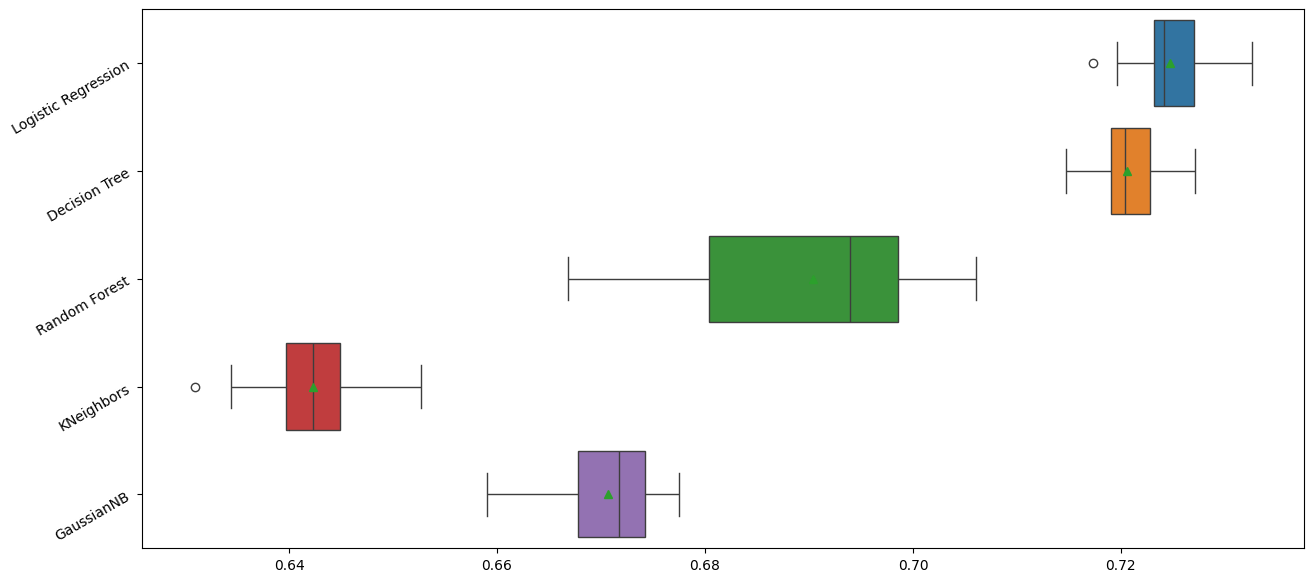

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

# Eliminamos todos los nulos de nuestro conjunto de train
X_sin_nulos = X_train_orig.dropna()
Y_sin_nulos = Y_train_orig[X_train_orig.index.isin(X_sin_nulos.index)]

# tomamos la segunda columna de la matriz edades
enc = OrdinalEncoder(categories = [[i[1] for i in edades]])
X_sin_nulos['Age_num'] = enc.fit_transform(X_sin_nulos[['Age']])
X_sin_nulos.drop('Age', axis=1, inplace=True)

# Creamos lso modelos en una estructura de lista para poder iterar sobre ellos, probaremos con los modelos con parametros para que no se demore tanto
models = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    KNeighborsClassifier(n_neighbors=5),
    GaussianNB()
]

# Creamos una lista con los nombres de los modelos
model_names = [
    'Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'KNeighbors',
    'GaussianNB'
]

pipelines = [Pipeline(steps=[(m[1], m[0])]) for m in zip(models, model_names)]

resultados = list()
for p in pipelines:

    #Evaluamos el modelo
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(p, X_sin_nulos, Y_sin_nulos, scoring='accuracy', cv=cv, n_jobs=-1) 
    
    #Calculamos el accuracy de los resultados
    resultados.append(scores)
    print('>%s %.3f (%.3f)' % (p.steps[0][0], scores.mean(), scores.std()))# plot model performance for comparison

plt.figure(figsize=(15,7))
t = sns.boxplot(data=resultados, showmeans=True, orient='h')
t.set_yticklabels(model_names,rotation=30)
plt.show()

Procedemos a probar diferentes tecnicas de imputación
1. Simple Imputer
    - media

In [ ]:
from sklearn.model_selection import cross_val_score